In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Load the dataset
file_path = "Health Insurance Dataset.xlsx"
df = pd.read_excel(file_path)

In [12]:
# Descriptive statistics for variables
variable_columns = ['age', 'bmi', 'sex', 'smoker']
stats = df[variable_columns].describe(include='all')

# Display the results
print(stats)


                age          bmi   sex smoker
count   1338.000000  1342.000000  1342   1338
unique          NaN          NaN     5      2
top             NaN          NaN  male     no
freq            NaN          NaN   676   1064
mean      39.207025    31.562136   NaN    NaN
std       14.049960    24.530915   NaN    NaN
min       18.000000     6.098187   NaN    NaN
25%       27.000000    26.296250   NaN    NaN
50%       39.000000    30.400000   NaN    NaN
75%       51.000000    34.700000   NaN    NaN
max       64.000000   661.000000   NaN    NaN


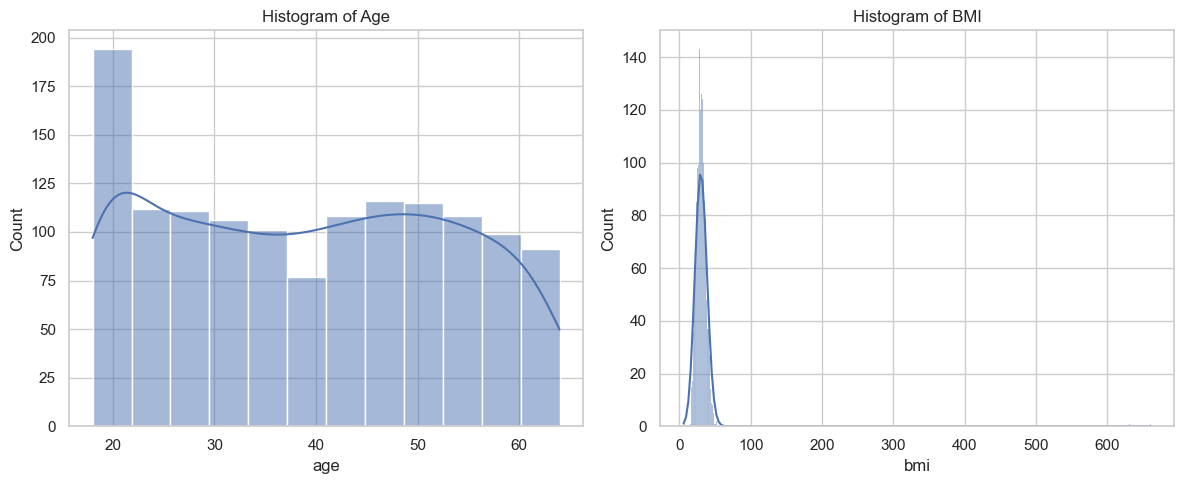

In [14]:
# Univariate Statistics - Continuous Variables (Age and BMI)
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of BMI')

plt.tight_layout()
plt.show()

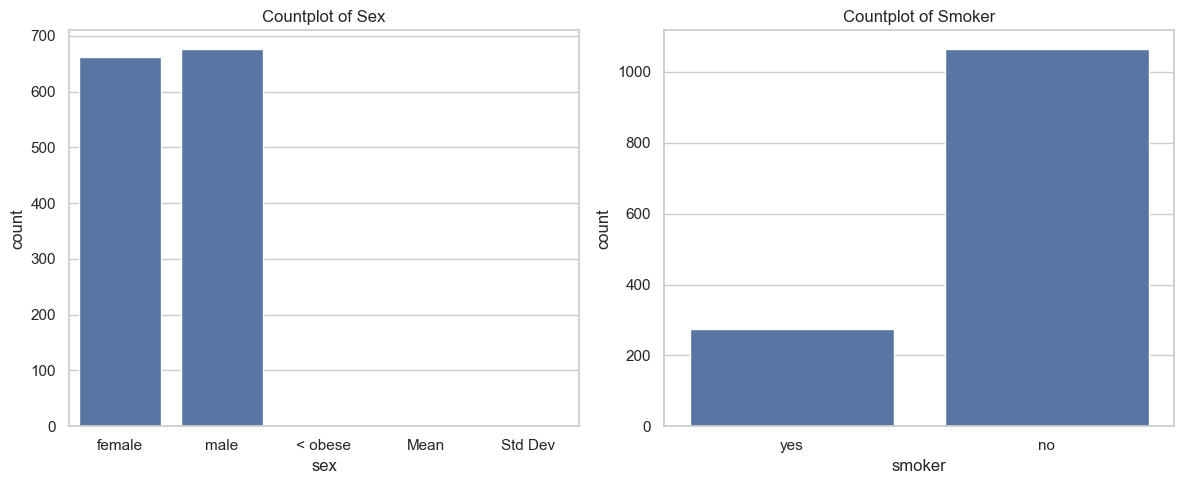

In [16]:
# Univariate Statistics - Categorical Variables (Sex and Smoker)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df['sex'], ax=axes[0])
axes[0].set_title('Countplot of Sex')

sns.countplot(x=df['smoker'], ax=axes[1])
axes[1].set_title('Countplot of Smoker')

plt.tight_layout()
plt.show()

Pearson correlation between BMI and Charges: 0.19834096883362884


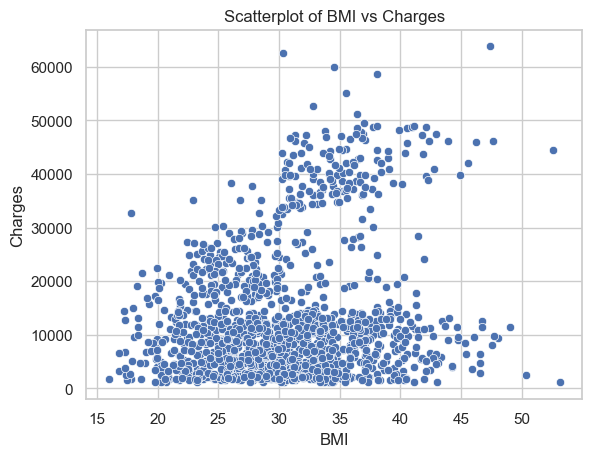

In [22]:
# Pearson correlation for BMI and Charges
correlation = df['bmi'].corr(df['charges'])
print("Pearson correlation between BMI and Charges:", correlation)

# Scatterplot of BMI vs Charges
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Optional for nicer style
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatterplot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


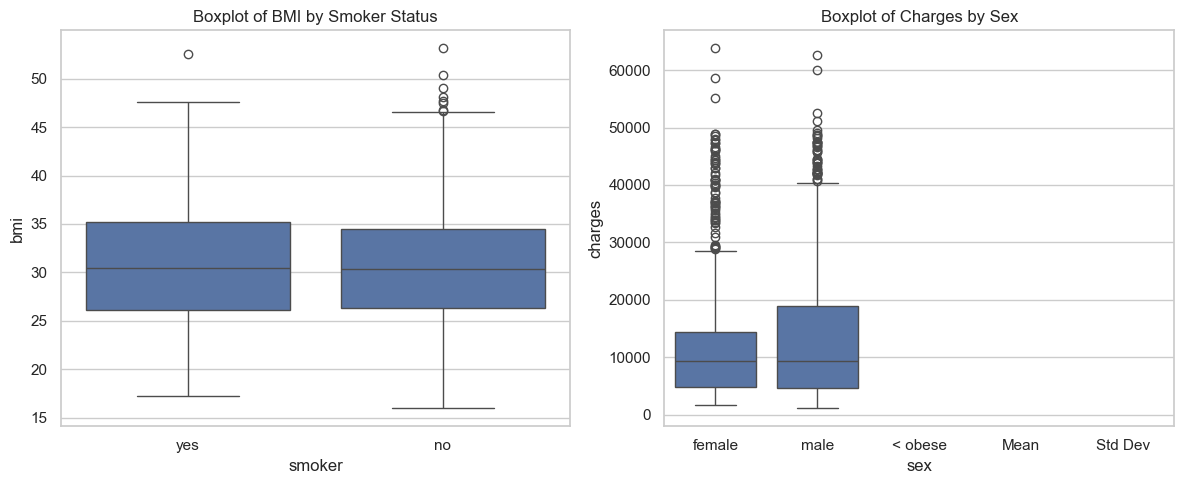

In [20]:
# Bivariate Statistics - Smoker vs BMI and Sex vs Charges
# Ensure 'charges' column is numeric
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='smoker', y='bmi', data=df, ax=axes[0])
axes[0].set_title('Boxplot of BMI by Smoker Status')

sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Charges by Sex')

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [28]:
# Parametric Test - T-Test for BMI based on Smoking Status
smoker_bmi = df[df['smoker'] == 'yes']['bmi']
nonsmoker_bmi = df[df['smoker'] == 'no']['bmi']

t_stat, p_value = stats.ttest_ind(smoker_bmi, nonsmoker_bmi)

print("Parametric Test - T-Test Results")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


Parametric Test - T-Test Results
T-Statistic: 0.13708403310827058
P-Value: 0.8909850280013041


In [30]:
# Nonparametric Test - Mann-Whitney U Test for Charges based on Smoking Status
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

u_stat, mann_p_value = stats.mannwhitneyu(smoker_charges, nonsmoker_charges)

print("\nNonparametric Test - Mann-Whitney U Test Results")
print("U-Statistic:", u_stat)
print("P-Value:", mann_p_value)


Nonparametric Test - Mann-Whitney U Test Results
U-Statistic: 284133.0
P-Value: 5.270233444503571e-130
